<a href="https://colab.research.google.com/github/Hutaf/SDA-Python/blob/master/Assignment_module_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### In each cell complete the task using pandas

In [73]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()

Read in the titanic.csv file in the `~/data` directory as a pandas dataframe called **df**

Or you can also use this link: https://raw.githubusercontent.com/daniel-dc-cd/data_science/master/module_3_Python/data/titanic.csv



In [74]:
url = 'https://raw.githubusercontent.com/daniel-dc-cd/data_science/master/module_3_Python/data/titanic.csv'
df = pd.read_csv(url,index_col=0,parse_dates=[0])

Display the head of the dataframe

In [75]:
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [76]:
df.tail()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [77]:
df.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [78]:
df.isnull().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

What is the percentage of people who survived? (hint find the mean of the survival column)

In [79]:
print("{}%  of people who survived".format(round(df.Survived.mean()*100)))

38%  of people who survived


How many women and how many men survived?

In [80]:
data = df[df['Survived']==1]
male = len(data[data['Sex'] == 'male'])
female = len(data[data['Sex'] == 'female'])


print("There are {} females and {} males survived".format(female, male))
print("Total survived:", len(data))

# Check
# (male+female)==len(data)


There are 233 females and 109 males survived
Total survived: 342


What is the percentage of people that survied who paid a fare less than 10?

In [81]:
survivals = df[df['Survived']==1]
fare_less_that_10 = survivals[survivals['Fare'] < 10]
percentage = (len(fare_less_that_10)/ len(survivals['Fare']))* 100
print("{}% of people that survied who paid a fare less than 10".format(round(percentage)))

20% of people that survied who paid a fare less than 10


What is the average age of those who didn't survive?

In [82]:
not_survivals = df[df['Survived']==0]
print("The average age of those who didn't survive:", round(not_survivals['Age'].mean()))

The average age of those who didn't survive: 31


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, "Agewise distribution of the people who didn't survive")

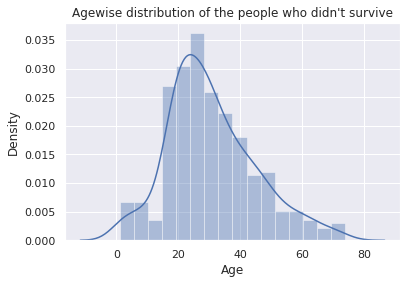

In [90]:
sns.distplot(not_survivals['Age'].dropna()).set_title("Agewise distribution of the people who didn't survive" )

What is the average age of those who did survive?

In [91]:
survivals = df[df['Survived']==1]
print("The average age of those who did survive:", round(survivals['Age'].mean()))

The average age of those who did survive: 28


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Agewise distribution of the people who survive')

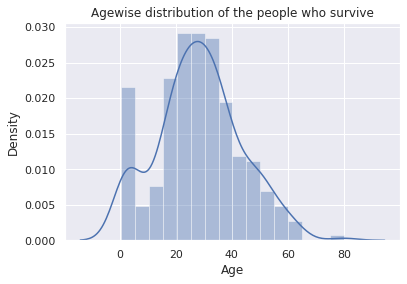

In [92]:
sns.distplot(survivals['Age'].dropna()).set_title("Agewise distribution of the people who survive" )

What is the average age of those who did and didn't survive grouped by gender?

In [106]:
s_age = survivals.groupby('Sex').Age.agg('mean')
n_age = not_survivals.groupby('Sex').Age.agg('mean')
avg_age = pd.concat([s_age, n_age], axis=1) 
avg_age = avg_age.rename(columns={'Age':'Avg Age of survivals','Age':'Avg Age of not survivals'})
avg_age

,Avg Age of not survivals,Avg Age of not survivals
Sex,,
female,28.847716,25.046875
male,27.276022,31.618056


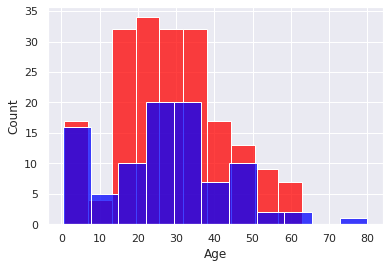

In [112]:
#Age wise Distribution of Male and Female survivals
sns.histplot(survivals['Age'][(survivals['Sex'] == 'female')].dropna(), label='Female', color = 'red')
sns.histplot(survivals['Age'][(survivals['Sex'] == 'male')].dropna(), label='Male', color='blue')

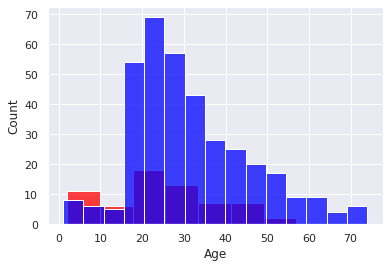

In [113]:
#Age wise Distribution of Male and Female who didn't survived
sns.histplot(not_survivals['Age'][(not_survivals['Sex'] == 'female')].dropna(), label='Female', color = 'red')
sns.histplot(not_survivals['Age'][(not_survivals['Sex'] == 'male')].dropna(), label='Male', color='blue')

## Tidy GDP


Manipulate the GDP.csv file and make it tidy, the result should be a pandas dataframe with the following columns:
* Country Name
* Country Code
* Year
* GDP

In [224]:
# Data tokenization done using Excel
url = 'https://raw.githubusercontent.com/Hutaf/SDA-Python/master/EDA/Data/GDP.csv'
GDP = pd.read_csv(url, sep=';')

In [225]:
GDP.describe()

,1961,1962,1963,1964,1965,1966,1967,1968,1969,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,Unnamed: 62
count,1.330000e+02,1.350000e+02,1.350000e+02,1.350000e+02,1.440000e+02,1.450000e+02,1.490000e+02,1.530000e+02,1.530000e+02,1.620000e+02,1.630000e+02,1.630000e+02,1.630000e+02,1.640000e+02,1.680000e+02,1.690000e+02,1.730000e+02,1.720000e+02,1.730000e+02,1.850000e+02,1.880000e+02,1.880000e+02,1.890000e+02,1.920000e+02,1.930000e+02,1.940000e+02,1.990000e+02,2.010000e+02,2.050000e+02,2.190000e+02,2.220000e+02,2.220000e+02,2.250000e+02,2.280000e+02,2.360000e+02,2.370000e+02,2.360000e+02,2.380000e+02,2.390000e+02,2.450000e+02,2.450000e+02,2.490000e+02,2.490000e+02,2.500000e+02,2.500000e+02,2.510000e+02,2.510000e+02,2.490000e+02,2.490000e+02,2.490000e+02,2.500000e+02,2.470000e+02,2.480000e+02,2.470000e+02,2.470000e+02,2.410000e+02,2.350000e+02,1.100000e+01
mean,7.658803e+10,8.108469e+10,8.764005e+10,9.619750e+10,9.935104e+10,1.066323e+11,1.101036e+11,1.154533e+11,1.273555e+11,1.338811e+11,1.468064e+11,1.692099e+11,2.078032e+11,2.405329e+11,2.629619e+11,2.829020e+11,3.124048e+11,3.672173e+11,4.271586e+11,4.538982e+11,4.560138e+11,4.501749e+11,4.524213e+11,4.590692e+11,4.793239e+11,5.613934e+11,6.217231e+11,6.861687e+11,7.176613e+11,7.620013e+11,7.948498e+11,8.386105e+11,8.412023e+11,8.913394e+11,9.611975e+11,9.864762e+11,9.900972e+11,9.800318e+11,1.000717e+12,1.008432e+12,1.006689e+12,1.031489e+12,1.165115e+12,1.317834e+12,1.442247e+12,1.575834e+12,1.805544e+12,2.029263e+12,1.924999e+12,2.139043e+12,2.393809e+12,2.489319e+12,2.568928e+12,2.653589e+12,2.497870e+12,2.586180e+12,2.835795e+12,2.425689e+11
std,2.245723e+11,2.402157e+11,2.583581e+11,2.827294e+11,2.987076e+11,3.247044e+11,3.422987e+11,3.651771e+11,4.011010e+11,4.288863e+11,4.732728e+11,5.469780e+11,6.638646e+11,7.520336e+11,8.312659e+11,8.988830e+11,1.004966e+12,1.196146e+12,1.385118e+12,1.502339e+12,1.513487e+12,1.499740e+12,1.537685e+12,1.587952e+12,1.667642e+12,1.994781e+12,2.266612e+12,2.532002e+12,2.622892e+12,2.869806e+12,3.014932e+12,3.225438e+12,3.233945e+12,3.444746e+12,3.763594e+12,3.813682e+12,3.779552e+12,3.779345e+12,3.928075e+12,3.975319e+12,3.952438e+12,4.084325e+12,4.588574e+12,5.132044e+12,5.493591e+12,5.878234e+12,6.567011e+12,7.162931e+12,6.764987e+12,7.328782e+12,8.094182e+12,8.297944e+12,8.521031e+12,8.770212e+12,8.306429e+12,8.527845e+12,9.159808e+12,4.544661e+11
min,1.159202e+07,9.122751e+06,1.084010e+07,1.271247e+07,1.359393e+07,1.446908e+07,1.583518e+07,1.460000e+07,1.585000e+07,1.429528e+07,1.527863e+07,1.893653e+07,2.419602e+07,3.151486e+07,3.250674e+07,3.003642e+07,3.413939e+07,4.156747e+07,4.262017e+07,3.871555e+07,3.102000e+07,3.491800e+07,3.783784e+07,4.124616e+07,3.212515e+07,3.208556e+07,3.360874e+07,4.297211e+07,4.111972e+07,8.824448e+06,9.365166e+06,9.742949e+06,9.630763e+06,1.088683e+07,1.102595e+07,1.233485e+07,1.270091e+07,1.275763e+07,1.368714e+07,1.374206e+07,1.319654e+07,1.545099e+07,1.823108e+07,2.153493e+07,2.183910e+07,2.290286e+07,2.043274e+07,3.029022e+07,2.710108e+07,3.182352e+07,3.871183e+07,3.767173e+07,3.750912e+07,3.729059e+07,3.555604e+07,3.657261e+07,3.973132e+07,3.364275e+08
25%,5.488889e+08,5.603789e+08,6.322651e+08,6.504750e+08,5.981193e+08,6.580790e+08,6.212260e+08,6.412142e+08,6.680000e+08,5.212108e+08,5.201449e+08,5.759978e+08,7.128399e+08,1.032409e+09,1.105173e+09,1.064518e+09,9.353605e+08,1.195507e+09,1.288715e+09,1.362152e+09,1.336800e+09,1.324156e+09,1.297765e+09,1.326005e+09,1.417576e+09,1.786820e+09,1.927015e+09,2.143484e+09,2.212536e+09,2.548675e+09,2.653302e+09,2.323669e+09,2.332018e+09,2.163497e+09,2.511861e+09,2.786045e+09,2.909666e+09,2.981040e+09,3.034541e+09,2.682347e+09,2.812846e+09,2.999511e+09,3.355083e+09,3.813500e+09,4.491407e+09,4.709846e+09,5.761125e+09,6.109928e+09,5.832915e+09,6.959697e+09,7.674355e+09,

In [226]:
GDP.info

<bound method DataFrame.info of      Country Name Country Code  ...          2017 Unnamed: 62
0           Aruba          ABW  ...           NaN         NaN
1     Afghanistan          AFG  ...  2.081530e+10         NaN
2          Angola          AGO  ...  1.242090e+11         NaN
3         Albania          ALB  ...  1.303935e+10         NaN
4         Andorra          AND  ...  3.012914e+09         NaN
..            ...          ...  ...           ...         ...
259        Kosovo          XKX  ...  7.128691e+09         NaN
260         Yemen         Rep.  ...  1.821333e+10         NaN
261  South Africa          ZAF  ...  3.494190e+11         NaN
262        Zambia          ZMB  ...  2.580867e+10         NaN
263      Zimbabwe          ZWE  ...  1.784582e+10         NaN

[264 rows x 63 columns]>

In [227]:
GDP.head(10)

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,Unnamed: 62
0,Aruba,ABW,GDP (current US$),NY.GDP.MKTP.CD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.330168e+09,1.320670e+09,1.379888e+09,1.531844e+09,1.665363e+09,1.722799e+09,1.873453e+09,1.920263e+09,1.941095e+09,2.021302e+09,2.228279e+09,2.331006e+09,2.421475e+09,2.623726e+09,2.791961e+09,2.498933e+09,2.467704e+09,2.584464e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,AFG,GDP (current US$),NY.GDP.MKTP.CD,537777811.1,548888895.6,5.466667e+08,7.511112e+08,8.000000e+08,1.006667e+09,1.400000e+09,1.673333e+09,1.373333e+09,1.408889e+09,1.748887e+09,1.831109e+09,1.595555e+09,1.733333e+09,2.155555e+09,2.366667e+09,2.555556e+09,2.953333e+09,3.300000e+09,3.697940e+09,3.641723e+09,3.478788e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.461666e+09,4.128821e+09,4.583644e+09,5.285466e+09,6.275074e+09,7.057598e+09,9.843842e+09,1.019053e+10,1.248694e+10,1.593680e+10,1.793024e+10,2.053654e+10,2.026425e+10,2.061610e+10,1.921556e+10,1.946902e+10,2.081530e+10,NaN
2,Angola,AGO,GDP (current US$),NY.GDP.MKTP.CD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.930503e+09,5.550483e+09,5.550483e+09,5.784342e+09,6.131475e+09,7.553560e+09,7.072063e+09,8.083872e+09,8.769251e+09,1.020110e+10,1.122876e+10,1.060378e+10,8.307811e+09,5.768720e+09,4.438321e+09,5.538749e+09,7.526447e+09,7.648377e+09,6.506230e+09,6.152923e+09,9.129595e+09,8.936064e+09,1.249735e+10,1.418895e+10,1.964085e+10,2.823371e+10,4.178948e+10,6.044892e+10,8.417804e+10,7.549239e+10,8.252614e+10,1.041160e+11,1.139230e+11,1.249130e+11,1.267300e+11,1.026210e+11,9.533720e+10,1.242090e+11,NaN
3,Albania,ALB,GDP (current US$),NY.GDP.MKTP.CD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.924242e+09,1.965385e+09,2.173750e+09,2.156625e+09,2.126000e+09,2.335125e+09,2.101625e+09,1.139167e+09,7.094526e+08,1.228071e+09,1.985674e+09,2.424499e+09,3.314898e+09,2.359903e+09,2.707124e+09,3.414761e+09,3.632044e+09,4.060759e+09,4.435079e+09,5.746946e+09,7.314865e+09,8.158549e+09,8.992642e+09,1.070101e+10,1.288135e+10,1.204421e+10,1.192695e+10,1.289087e+10,1.231978e+10,1.277628e+10,1.322824e+10,1.138693e+10,1.188368e+10,1.303935e+10,NaN
4,Andorra,AND,GDP (current US$),NY.GDP.MKTP.CD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.861921e+07,8.940982e+07,1.134082e+08,1.508201e+08,1.865587e+08,2.201272e+08,2.272810e+08,2.540202e+08,3.080089e+08,4.115783e+08,4.464161e+08,3.889587e+08,3.758960e+08,3.278618e+08,3.300707e+08,3.467380e+08,4.820006e+08,6.113164e+08,7.214259e+08,7.954493e+08,1.029048e+09,1.106929e+09,1.210014e+09,1.007026e+09,1.017549e+09,1.178739e+09,1.223945e+09,1.180597e+09,1.211932e+09,1.239876e+09,1.434430e+09,1.496913e+09,1.733117e+09,2.398646e+09,2.935659e+09,3.255789e+09,3.543257e+09,4.016972e+09,4.007353e+09,3.660531e+09,3.355695e+09,3.442063e+09,3.164615e+09,3.281585e+09,3.350736e+09,2.811489e+09,2.877312e+09,3.012914e+09,NaN
5,Arab World,ARB,GDP (current US$),NY.GDP.MKTP.CD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.575266e+10,2.842535e+10,3.137573e+10,3.641557e+10,4.330257e+10,5.500127e+10,1.051130e+11,1.163010e+11,1.448010e+11,1.672560e+11,1.834980e+11,2.485690e+11,3.380720e+11,3.484840e+11,3.242280e+11,3.038680e+11,3.078450e+11,3.037990e+11,2.889390e+11,3.125840e+11,3.074070e+11,3.222250e+11,4.467380e+11,4.396420e+11,4.710170e+11,4.763650e+11,4.873750e+11,5.233570e+11,5.780120e+11,6.128960e+11,5.906930e+11,6.431480e+11,7.347680e+11,7.232830e+11,7.290520e+11,8.231110e+11,9.638620e+11,1.184660e+12,1.404110e+12,1.637570e+12,2.078120e+12,1.795820e+12,2.1095

In [228]:
GDP = GDP.drop(columns= ['Indicator Name',	'Indicator Code', 'Unnamed: 62'])
GDP.head(3)

,Country Name,Country Code,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,Aruba,ABW,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.330168e+09,1.320670e+09,1.379888e+09,1.531844e+09,1.665363e+09,1.722799e+09,1.873453e+09,1.920263e+09,1.941095e+09,2.021302e+09,2.228279e+09,2.331006e+09,2.421475e+09,2.623726e+09,2.791961e+09,2.498933e+09,2.467704e+09,2.584464e+09,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,AFG,537777811.1,548888895.6,546666677.8,751111191.1,800000044.4,1.006667e+09,1.400000e+09,1.673333e+09,1.373333e+09,1.408889e+09,1.748887e+09,1.831109e+09,1.595555e+09,1.733333e+09,2.155555e+09,2.366667e+09,2.555556e+09,2.953333e+09,3.300000e+09,3.697940e+09,3.641723e+09,3.478788e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.461666e+09,4.128821e+09,4.583644e+09,5.285466e+09,6.275074e+09,7.057598e+09,9.843842e+09,1.019053e+10,1.248694e+10,1.593680e+10,1.793024e+10,2.053654e+10,2.026425e+10,2.061610e+10,1.921556e+10,1.946902e+10,2.081530e+10
2,Angola,AGO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.930503e+09,5.550483e+09,5.550483e+09,5.784342e+09,6.131475e+09,7.553560e+09,7.072063e+09,8.083872e+09,8.769251e+09,1.020110e+10,1.122876e+10,1.060378e+10,8.307811e+09,5.768720e+09,4.438321e+09,5.538749e+09,7.526447e+09,7.648377e+09,6.506230e+09,6.152923e+09,9.129595e+09,8.936064e+09,1.249735e+10,1.418895e+10,1.964085e+10,2.823371e+10,4.178948e+10,6.044892e+10,8.417804e+10,7.549239e+10,8.252614e+10,1.041160e+11,1.139230e+11,1.249130e+11,1.267300e+11,1.026210e+11,9.533720e+10,1.242090e+11


In [229]:
GDP = GDP.melt(id_vars=['Country Name', 'Country Code'], var_name='Year', value_name='GDP')
GDP.head(3)

,Country Name,Country Code,Year,GDP
0,Aruba,ABW,1960,NaN
1,Afghanistan,AFG,1960,537777811.1
2,Angola,AGO,1960,NaN


In [232]:
#GDP.notnull().sum()
GDP.isnull().sum()

Country Name       0
Country Code       0
Year               0
GDP             3532
dtype: int64

In [233]:
GDP = GDP.dropna()

In [236]:
GDP

,Country Name,Country Code,Year,GDP
1,Afghanistan,AFG,1960,537777811.1
11,Australia,AUS,1960,18573188487
12,Austria,AUT,1960,6592693841
14,Burundi,BDI,1960,195999990
15,Belgium,BEL,1960,11658722591
...,...,...,...,...
15307,Kosovo,XKX,2017,7.12869e+09
15308,Yemen,Rep.,2017,1.82133e+10
15309,South Africa,ZAF,2017,3.49419e+11
15310,Zambia,ZMB,2017,2.58087e+10
